In [3]:
# Importing necessary tensorflow library and printing the TF version.
import tensorflow as tf

print("TensorFlow version: ",tf.version.VERSION)

TensorFlow version:  2.18.0


In [4]:
# Here we'll import Pandas and Numpy data processing libraries
import pandas as pd
import numpy as np
# Use matplotlib for visualizing the model
import matplotlib.pyplot as plt
# Use seaborn for data visualization
import seaborn as sns
%matplotlib inline

In [7]:
# Reading "kyphosis.csv" file using the read_csv() function included in the pandas library
df = pd.read_csv('kyphosis.csv')

In [8]:
# Output the first five rows
df.head()

,Unnamed: 0,Kyphosis,Age,Number,Start
0,1,absent,71,3,5
1,2,absent,158,3,14
2,3,present,128,4,5
3,4,absent,2,5,1
4,5,absent,1,4,15


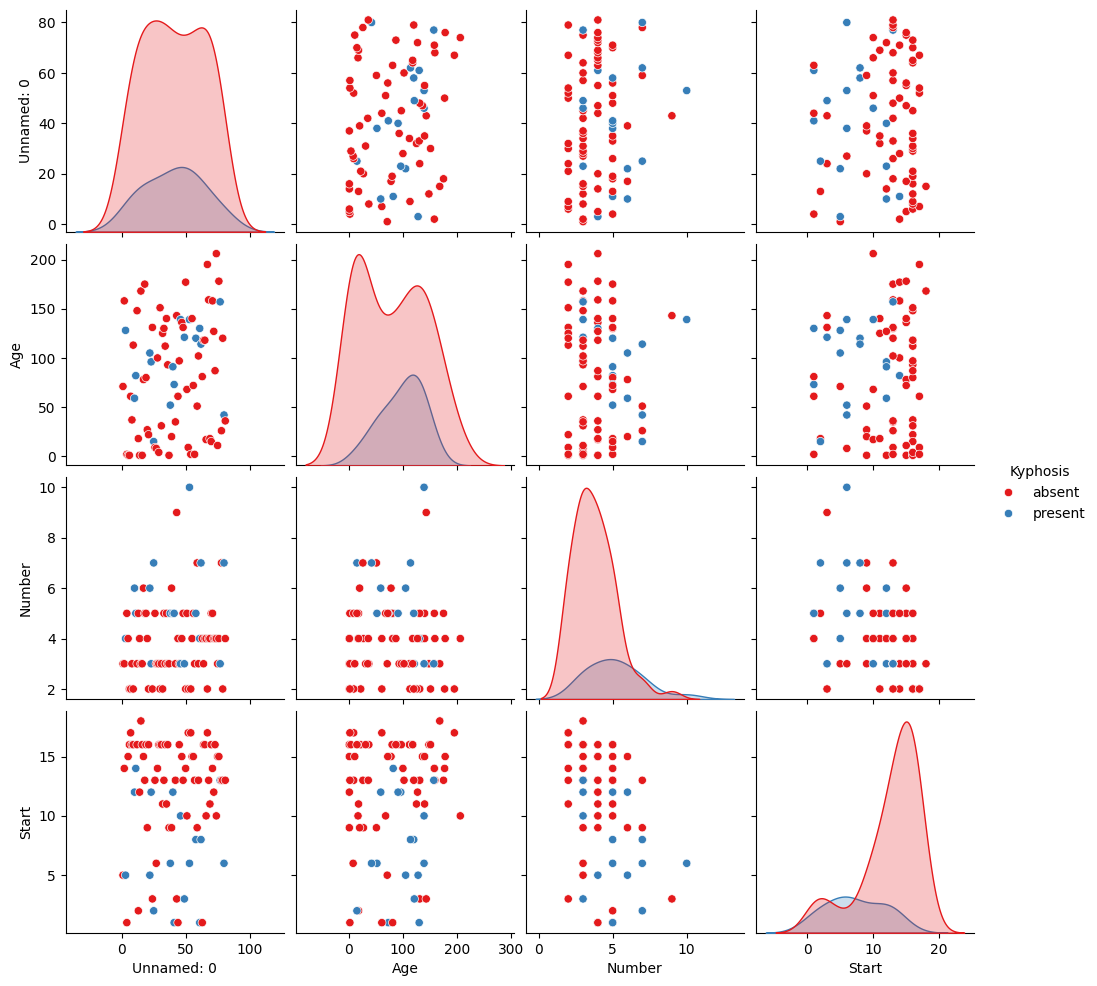

In [9]:
# Here you are using the pairplot() function to plot multiple pairwise bivariate distributions in a dataset
# TODO 1
sns.pairplot(df,hue='Kyphosis',palette='Set1')

In [10]:
# Import train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split

In [11]:
# Remove column name 'Kyphosis'
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [12]:
# Let's split up the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [13]:
# Import Decision Tree Classifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier


In [14]:
# Create Decision Tree classifer object
dtree = DecisionTreeClassifier()

In [15]:
# Train Decision Tree Classifer
# TODO 2
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [16]:
# Predict the response for test dataset
predictions = dtree.predict(X_test)


In [17]:
# Importing the classification_report and confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix

In [18]:
# Here you will build a text report showing the main classification metrics
# TODO 3a
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.79      0.88      0.83        17
     present       0.67      0.50      0.57         8

    accuracy                           0.76        25
   macro avg       0.73      0.69      0.70        25
weighted avg       0.75      0.76      0.75        25



In [19]:
# Now you can compute confusion matrix to evaluate the accuracy of a classification
# TODO 3b
print(confusion_matrix(y_test,predictions))

[[15  2]
 [ 4  4]]


In [21]:
# Here you are importing some built-in visualization functionalities for decision trees
from IPython.display import Image
from io import StringIO  # Import StringIO from io module instead of sklearn.externals.six
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns[1:])
features

['Kyphosis', 'Age', 'Number', 'Start']

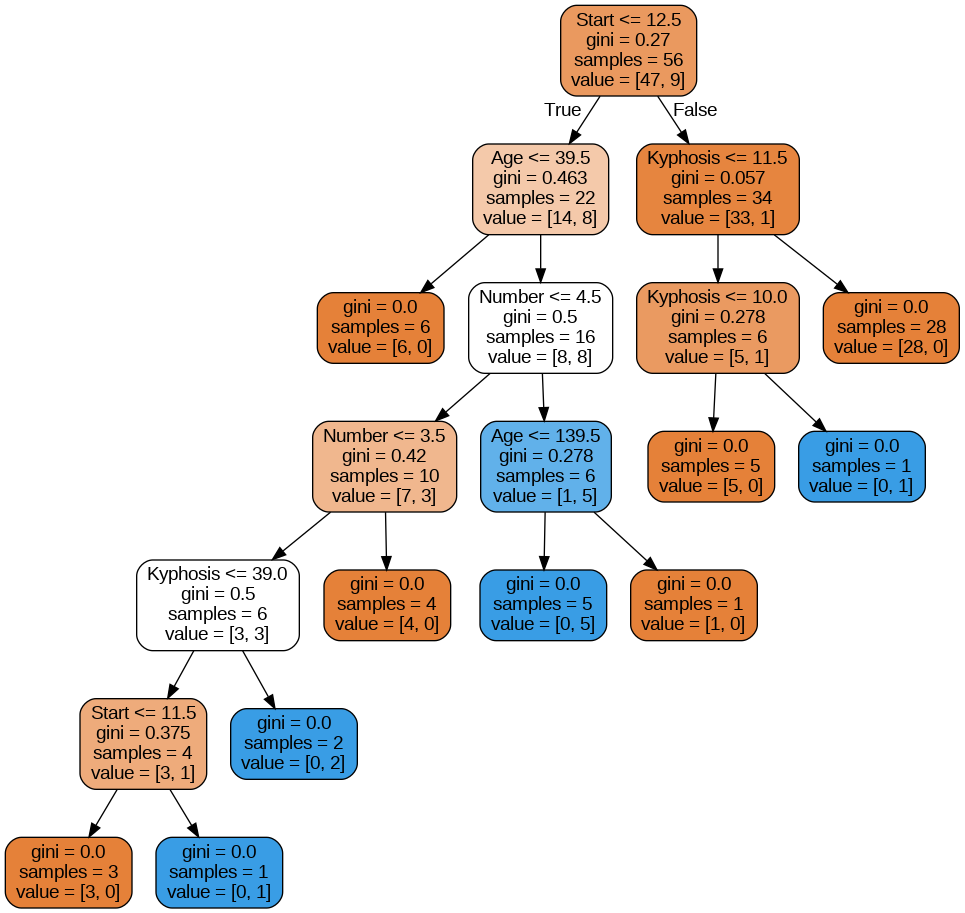

In [22]:
# Now you are ready to visualize your Decision Tree model
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [23]:
# Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# Create a Gaussian Classifier
rfc = RandomForestClassifier(n_estimators=100)

# Train Random Forest Classifer
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [24]:
# Train model using the training sets
rfc_pred = rfc.predict(X_test)

In [25]:
# Now you can compute confusion matrix to evaluate the accuracy
# TODO 4a
print(confusion_matrix(y_test,rfc_pred))

[[16  1]
 [ 7  1]]


In [26]:
# Finally you will build a text report showing the main metrics
# TODO 4b
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.70      0.94      0.80        17
     present       0.50      0.12      0.20         8

    accuracy                           0.68        25
   macro avg       0.60      0.53      0.50        25
weighted avg       0.63      0.68      0.61        25

